In [1]:
%run ../../multibench.py

In [2]:
%%bash
alias cobs=/home/manzik/Documents/cmdbench/repo/bioinformatics/cobs/basic-test/cobs/build/src/cobs

In [3]:
import sys
import os
import shutil
import numpy as np
import glob
from shutil import copyfile

# Move two upper directories, import benchmark, revert cwd
sys.path.append("../..")
import cmdbench

# Summarize numpy array if it has more than 10 elements
np.set_printoptions(threshold=10)

def clean_if_exists(path):
    if os.path.exists(path):
        if(os.path.isfile(path)):
            os.remove(path)
        else:
            shutil.rmtree(path)
            os.mkdir(path)
def get_last_n_lines(string, n):
    return "\n".join(string.split("\n")[-n:])
def create_folder_if_doesnt_exist(path):
    if not os.path.exists(path):
        os.makedirs(path)


In [4]:
input_samples = [os.path.basename(f) for f in glob.glob('input/*_1.fastq.gz')]
input_samples = [f.replace('_1.fastq.gz','') for f in input_samples]
print(input_samples)

['2014C-3599', '2014C-3656', '2014C-3840', '2014C-3655', '2014C-3598', '2014C-3850', '2014C-3857', '2014C-3907', '2014C-3600']


In [5]:
sample_sizes = list(range(1, len(input_samples) + 1))
sample_sizes

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
create_folder_if_doesnt_exist("cobs-data")
create_folder_if_doesnt_exist("cobs-data/samples")

In [7]:
def reset_func():
    clean_if_exists("cobs-data/samples/")
    clean_if_exists("cobs-data/example.cobs_compact")
    clean_if_exists("cobs-data/example.cobs_compact.tmp")
    pass
    
def benchmark_list_to_results(benchmark_firsts_list):
    return {
        "memory": max(list(map(lambda result: result.memory.max, benchmark_firsts_list))),
        "disk_read": max(list(map(lambda result: result.disk.read_chars, benchmark_firsts_list))),
        "disk_write": max(list(map(lambda result: result.disk.write_chars, benchmark_firsts_list))),
        "runtime": sum(list(map(lambda result: result.process.execution_time, benchmark_firsts_list)))
    }

def sampling_func(sample_size):
    # Copy files we want to be part of the sample
    # from inputs to cobs-data/samples/ and return their path
    samples = input_samples[:sample_size]
    samples_out = []
    for sample in samples:
        infile1, infile2 = "input/%s_1.fastq.gz" % sample, "input/%s_2.fastq.gz" % sample
        outfile1, outfile2 = "cobs-data/samples/%s_1.fastq.gz" % sample, "cobs-data/samples/%s_2.fastq.gz" % sample
        copyfile(infile1, outfile1)
        copyfile(infile2, outfile2)
    return ["cobs-data/samples/"]

build_command = {
    "command": "cobs/build/src/cobs compact-construct % cobs-data/example.cobs_compact",
    "parallel_args": "-j 1 -I%"
}

query_repeat_count = 2
query_sequence = "GAAGAAGATGGTGTACGCGGTGCGCGCCGCTATCTCGACCACCTTAAAATGGAATATGCCTTCTGGATGGACG"

query_command = {
    "command": "cobs/build/src/cobs query -i cobs-data/example.cobs_compact %",
    "parallel_argfiles": [query_sequence] * query_repeat_count,
    "parallel_args": "-j 1 -I%"
}

multibench_results, debug_str = multi_cmdbench({
"index": [build_command],
"query": [query_command]
}, reset_func = reset_func, iterations = 100, sampling_func = sampling_func, sample_sizes = sample_sizes, 
    benchmark_list_to_results=benchmark_list_to_results)


In [8]:
# print(debug_str)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

[{'memory': 28422184.96, 'disk_read': 3316656.73, 'disk_write': 5613372.4, 'runtime': 0.10469999999999985}, {'memory': 28487270.4, 'disk_read': 3719259.77, 'disk_write': 5643650.78, 'runtime': 0.11379999999999994}, {'memory': 28258344.96, 'disk_read': 4136120.44, 'disk_write': 5670050.82, 'runtime': 0.12519999999999987}, {'memory': 28308316.16, 'disk_read': 4593767.6, 'disk_write': 5690239.22, 'runtime': 0.13630000000000023}, {'memory': 28446187.52, 'disk_read': 5906184.59, 'disk_write': 6311894.55, 'runtime': 0.1537000000000002}, {'memory': 28496977.92, 'disk_read': 6269948.16, 'disk_write': 6201027.19, 'runtime': 0.15360000000000018}, {'memory': 28350996.48, 'disk_read': 6801360.5, 'disk_write': 6325805.48, 'runtime': 0.15810000000000016}, {'memory': 28334612.48, 'disk_read': 7268421.8, 'disk_write': 6333999.31, 'runtime': 0.16220000000000007}, {'memory': 28517785.6, 'disk_read': 8533189.81, 'disk_write': 6935469.27, 'runtime': 0.17330000000000007}]


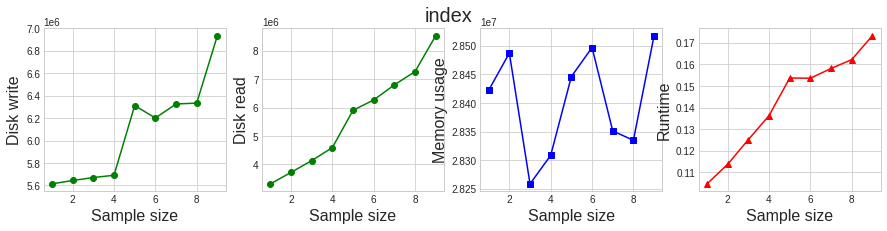

In [10]:
# Indexing Plots
plot_resources(multibench_results, sample_sizes, "index")

[{'memory': 28202434.56, 'disk_read': 2075841.25, 'disk_write': 231145.49, 'runtime': 0.08030000000000005}, {'memory': 27719065.6, 'disk_read': 2075856.3, 'disk_write': 231066.23, 'runtime': 0.08070000000000004}, {'memory': 28224471.04, 'disk_read': 2075852.17, 'disk_write': 231227.43, 'runtime': 0.08040000000000007}, {'memory': 28058501.12, 'disk_read': 2075928.88, 'disk_write': 230427.3, 'runtime': 0.08080000000000005}, {'memory': 28093603.84, 'disk_read': 2076014.87, 'disk_write': 230145.65, 'runtime': 0.08120000000000005}, {'memory': 28155699.2, 'disk_read': 2076036.65, 'disk_write': 229813.51, 'runtime': 0.08050000000000004}, {'memory': 28027985.92, 'disk_read': 2076023.6, 'disk_write': 230959.0, 'runtime': 0.08140000000000004}, {'memory': 28211036.16, 'disk_read': 2076033.02, 'disk_write': 230465.61, 'runtime': 0.08050000000000004}, {'memory': 27971133.44, 'disk_read': 2075451.31, 'disk_write': 229471.53, 'runtime': 0.08130000000000004}]


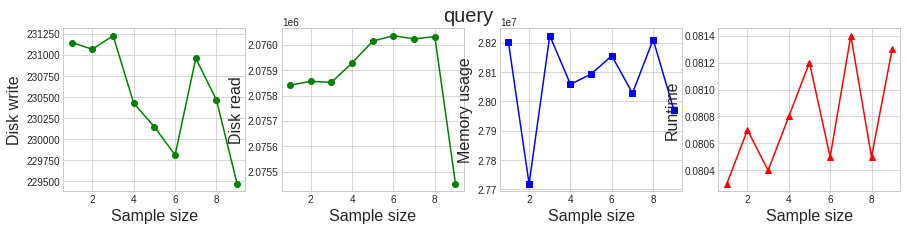

In [11]:
# Querying Plots
plot_resources(multibench_results, sample_sizes, "query")